# Problem 2 - Computing the Mandelbrot Set

### Problem 2a: Plotting the mandelbrot function using default partitioning

In [1]:
%pylab inline

import findspark
findspark.init()

from P2 import *
from pyspark import SparkContext, SparkConf
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.ticker as ticker   


# setup spark
conf = SparkConf().setAppName('Mandelbrot')
sc = SparkContext(conf=conf)

# create the space (this can be also done using spark's cartesian command)
nx, ny = (2000, 2000)
x = range(0, nx)
y = range(0, ny)

xv, yv = np.meshgrid(x, y)

# compute coordinate list
coords = zip(list(xv.ravel()), list(yv.ravel()))



Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib


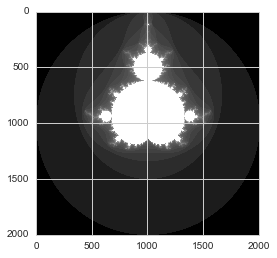

In [2]:
%pylab inline

# create rdd with 100 partitions
num_partitions = 100
rdd = sc.parallelize(coords, num_partitions)

# now map using mandelbrot to ((I, J), V) with (I, J) being the coordinates
# and V the value (i.e. iteration number) of the mandelbrot set
mb = lambda c: (c, mandelbrot((c[0] / 500.0) - 2.0, (c[1] / 500.0) - 2.0))

# apply mandelbrot function mb to the given set
rdd = rdd.map(mb)

# apply mandelbrot function and draw resulting image
draw_image(rdd)

# get sum_values_for_partitions and draw a histogram of it
data = sum_values_for_partitions(rdd).collect()

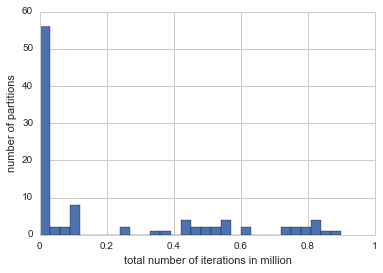

In [3]:
# plot a histogram
binwidth = 3 * 10**5

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(np.array(data), bins=np.arange(min(data), max(data) + binwidth, binwidth))
ax.set_xlabel('total number of iterations in million')
ax.set_ylabel('number of partitions')

# use the trick from http://stackoverflow.com/questions/10171618/changing-plot-scale-by-a-factor-in-matplotlib
# to scale figure in a nicer way
scale = 10e6                                                                                                                                                                                                                                                                  
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))                                                                                                                                                                                                           
ax.xaxis.set_major_formatter(ticks) 

# save figure as P2a_hist.png
plt.savefig('P2a_hist.png', dpi=120)